# Linear Regression with One Variable

We are going to begin this class using an example about the prices of some houses in Portland. We are using information as you know, based on Coursera and Standford Course of Machine Learning. So, let's take a look to the data.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True) # This command is used to avoid the scientific output

## Let's import the data. We have this dataset into data folder
data = np.loadtxt('./data/dataHouses.csv', dtype=np.float64,delimiter=',')
print(data[:4,::]) # See the first 4 rows of our data

[[  2104. 399900.]
 [  1600. 329900.]
 [  2400. 369000.]
 [  1416. 232000.]]


Now, we have our data in the **data** variable of our python code. The idea is like our first step create a figure and plot all the information.

Our information, as you can see, have two columns, the first column is the size of the house, the second is the price of the house. Let's make the figure:

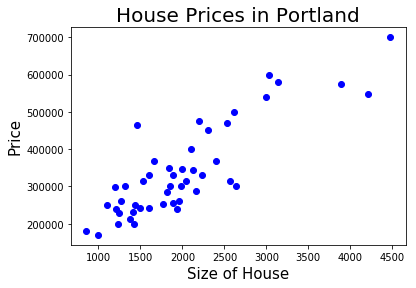

In [2]:
X = data[:,0]
Y = data[:,1]

plt.figure()
plt.title('House Prices in Portland', fontsize=20)
plt.xlabel('Size of House', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.scatter(X,Y,color='blue')

## Model Representation

To establish notation for future use, we'll use $x^{(i)}$ to denote the *input* variables (in this case the size of the House), sometimes you could call it input features, and $y^{(i)}$ to denote the *output* or target variable that we are trying to predict (in this case the price). A pair $(x^{(i)},y^{(i)})$ is called a training example, and the dataset that we'll be using to learn --a list of $m$ training examples $(x^{(i)},y^{(i)})$; $i=1,2,3,...,m$-- is called a training set. Note that the superscript **i** in the notation is simply an index into the training set, and has nothing to do with exponentiation. We will also use $X$ to denote the space of input values, and $Y$ to denote the space of output values. In this example, $X=Y=R$.

![Linear Regression](./images/linearRegression.png)

We need to obtain a line, as you see in the image above, it needs to approximate in the best way possible our data. That's why we use **Linear Regression** as the name.

To describe the supervised learning problem slightly more formally, our goal is, given a training set, to learn a function $h : X → Y$ so that $h(x)$ is a *good* predictor for the corresponding value of $y$. For historical reasons, this function $h$ is called a *hypothesis*. Seen pictorially, the process is therefore like this:

![Hypothesis](./images/hypothesis.png)

When the target variable that we’re trying to predict is continuous, such as in our housing example, we call the learning problem a regression problem. When $y$ can take on only a small number of discrete values (such as if, given the living area, we wanted to predict if a dwelling is a house or an apartment, say), we call it a classification problem.

## Cost Function

To create our **Cost Function** we need to define some kind of *hypothesis* function to try to predict the output values of our *model*. Taking into account that our problem is a *Linear Problem* the idea is to use this representation to build our function *hypothesis*.

### Hypothesis: $h_{\theta}(x) = \theta_{0} + \theta_{1}x$

### Parameters: $\theta_{i}$

So, our *hypothesis* function is already defined, but we need to choose $\theta_{0}$ and $\theta_{1}$ in some way that our predicted values stay close to the values defined by the data set.

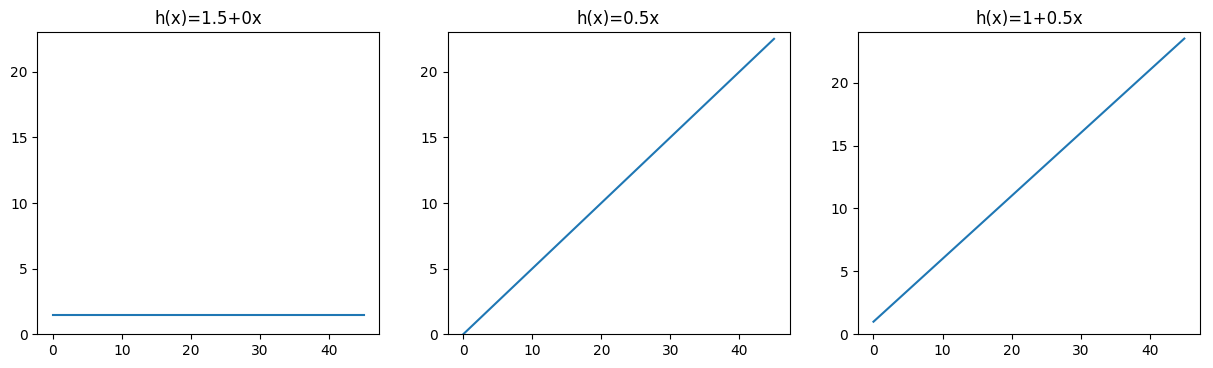

In [3]:
x = np.arange(0,50,5)

y = 1.5 + 0*x
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(1,3,1)
plt.plot(x,y)
plt.title('h(x)=1.5+0x')
plt.ylim(0,23)

y = 0 + 0.5*x
plt.subplot(1,3,2)
plt.plot(x,y)
plt.title('h(x)=0.5x')
plt.ylim(0,23)

y = 1.0 + 0.5*x
plt.subplot(1,3,3)
plt.plot(x,y)
plt.title('h(x)=1+0.5x')
plt.ylim(0,24);

As you can see, you could start to give values and try to discover if you have a good approximation to the data. However this would be a very complicated task. The idea is to measure, for each value of the $\theta$, how close the $h_{\theta}(x^{(i)})$ are to the corresponding $y^{(i)}$. So the **Cost Function** is defined by:

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$$

The function above is called the *Squared error function*, or *Mean squared error*. The mean is halved $\frac{1}{2}$ as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$ term. The idea is to minimize $J(\theta)$, to obtain the best $\theta$ to approximate the data set.

Ok, let's try to discover an algorithm to minimize the **Cost Function** $J(\theta)$. First let's go back and we will rewrite we've we seen before:

### Hypothesis: $h_{\theta}(x) = \theta_{0} + \theta_{1}x$

### Parameters: $\theta_{0},\theta_{1}$

### Cost Function: $J(\theta_{0},\theta_{1})=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$

### Goal: $minimize_{\theta_{0},\theta_{1}} J(\theta_{0},\theta_{1})$

Now we are going to make the things easier, and we will create a simplified version of our problem, let's take a look:

### Hypothesis: $h_{\theta}(x) = \theta_{1}x$

### Parameters: $\theta_{1}$

### Cost Function: $J(\theta_{1})=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$

### Goal: $minimize_{\theta_{1}} J(\theta_{1})$

Text(0,0.5,'J(theta)')

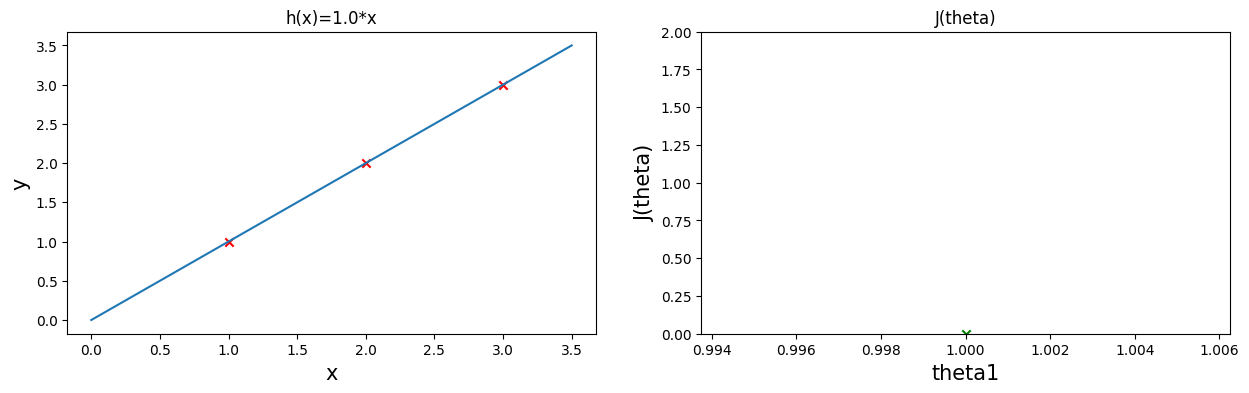

In [4]:
x = np.arange(0,4.0,0.5)

x1 = np.arange(1,4,1)

# if theta1 is fixed, this is a function of x
# if theta1 is equal to 1
theta1 = 1
y = theta1*x
y1 = theta1*x1
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(1,2,1)
plt.plot(x,y)
plt.scatter(x1,y1,color='red',marker='x')
plt.title('h(x)=1.0*x')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)


plt.subplot(1,2,2)
plt.scatter(1,0,color='green',marker='x')
plt.title('J(theta)')
plt.ylim(0,2)
plt.xlabel('theta1', fontsize=15)
plt.ylabel('J(theta)', fontsize=15)

This example shows the ideal situation where we have a cost function of 0. When we select $\theta_{1} = 1$, we get a slope of $1$ which goes through every single data point in our model. Conversely when $\theta_{1} = 0.5$, we see the vertical distance from our model to the data points increase.

Text(0,0.5,'J(theta)')

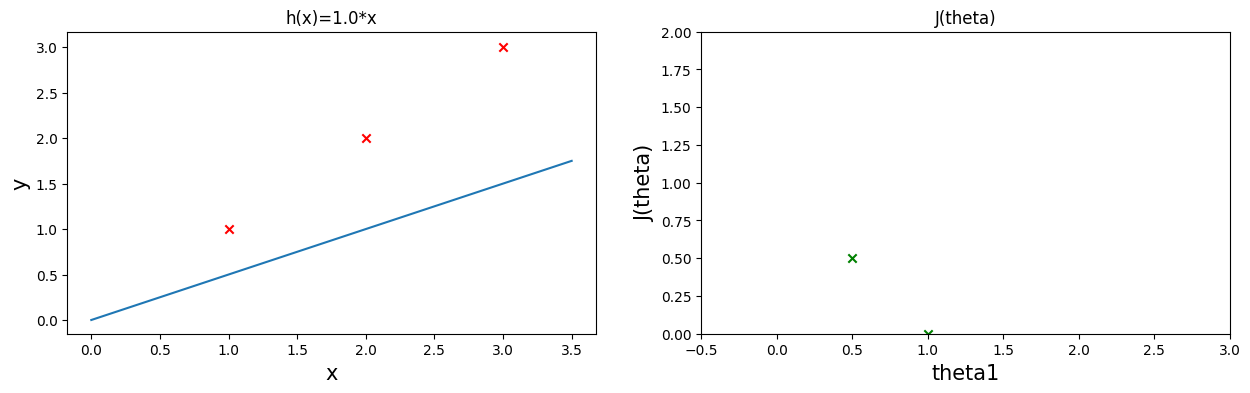

In [5]:
x = np.arange(0,4.0,0.5)

x1 = np.arange(1,4,1)

# if theta1 is fixed, this is a function of x
# if theta1 is equal to 1
theta1 = 0.5
y = theta1*x
y1 = 1*x1
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(1,2,1)
plt.plot(x,y)
plt.scatter(x1,y1,color='red',marker='x')
plt.title('h(x)=1.0*x')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)


plt.subplot(1,2,2)
plt.scatter([1,0.5],[0,0.5],color='green',marker='x')
plt.title('J(theta)')
plt.ylim(0,2)
plt.xlim(-0.5,3.0)
plt.xlabel('theta1', fontsize=15)
plt.ylabel('J(theta)', fontsize=15)

As you can see, the plot of $J(\theta)$, shows two points, one of them is when theta1 is equal to 1. In this case the Cost Function is equal to zero. If you choose $\theta_{1} = 0.5$ then $J(\theta) = 0.58333333$

Text(0,0.5,'J(theta)')

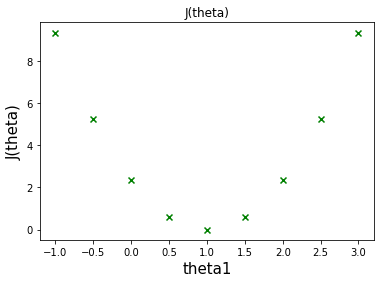

In [6]:
x = np.array([1, 2, 3]) # Input Variables
y = np.array([1, 2, 3]) # Target Variables
m = x.shape[0] # Number of Variables. x,y are known as training example
theta1 = np.array([1.0,0.5,1.5,2,2.5,0,-0.5,-1.0,3.0]) # One of the parameters of our hypothesis
J = np.zeros(theta1.shape[0])
j = 0
for i in theta1:
    h_theta = i*x
    J[j] = (1/(2*m)) * (np.sum(np.square(h_theta - y))) # Cost function to minimize
    j = j + 1
plt.scatter(theta1,J,color='green',marker='x')
plt.title('J(theta)')
plt.xlabel('theta1', fontsize=15)
plt.ylabel('J(theta)', fontsize=15)

Is clear that the answer to our simplified version of the Cost Function is $\theta_{1} = 1$, this is our global minimum as you can see in the figure above.

Now, in general terms, our model is:

### Hypothesis: $h_{\theta}(x) = \theta_{0} + \theta_{1}x$

### Parameters: $\theta_{0},\theta_{1}$

### Cost Function: $J(\theta_{0},\theta_{1})=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$

### Goal: $minimize_{\theta_{0},\theta_{1}} J(\theta_{0},\theta_{1})$


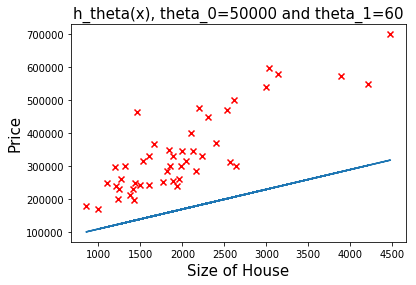

In [7]:
theta_0 = 50
theta_1 = 0.06
h_theta = 50000 + 60*X # Our hypothesis

plt.figure()
plt.title('h_theta(x), theta_0=50000 and theta_1=60', fontsize=15)
plt.xlabel('Size of House', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.scatter(X,Y,color='red',marker='x')
plt.plot(X,h_theta)

As you can see in the figure above our hypothesis isn't very good. If we have $\theta_{0}$ and $\theta_{1}$ fixed you obtain a function of $x$. In the figure the hypothesis is defined as $h_{\theta}(x) = 50000 + 60x$. But you can make some contour plots to see how is the $J(\theta_{0},\theta_{1})$ and try to find the optimum value.

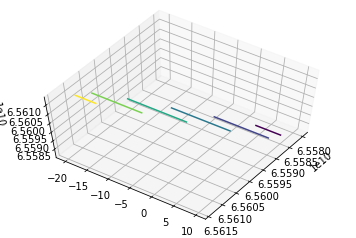

In [9]:
#x = np.array([1, 2, 3]) # Input Variables
#y = np.array([1, 2, 3]) # Target Variables

X1 = X / 1000

m = X.shape[0] # Number of Variables. x,y are known as training example

nx = 300
ny = 300
theta0 = np.linspace(-20, 10, nx)
theta1 = np.linspace(-20, 10, ny)
THETA0, THETA1 = np.meshgrid(theta0, theta1)
J = THETA0

for i in range(nx):
    for j in range(ny):
        h_theta = THETA0[i,j] + THETA1[i,j]*X1
        J[i,j] = (1/(2*m)) * (np.sum(np.square(h_theta - Y))) # Cost function to minimize

#theta1 = np.array([1.0,0.5,1.5,2,2.5,0,-0.5,-1.0,3.0]) # One of the parameters of our hypothesis
#theta0 = np.array([1.0,0.5,1.5,2,2.5,0,-0.5,-1.0,3.0]) # One of the parameters of our hypothesis
#J = np.zeros(theta1.shape[0])
#j = 0
#for i in theta0:
#    h_theta = i + theta1[j]*x
#    J[j] = (1/(2*m)) * (np.sum(np.square(h_theta - y))) # Cost function to minimize
#    j = j + 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(THETA0, THETA1, J)
ax.view_init(60, 35)